In [1]:
from pathlib import Path
import numpy as np
import georeferencing
from tqdm import tqdm
import hyspec_io
import image_render
import skimage.io
import matplotlib.pyplot as plt

In [2]:
# Parameters
# Rrs_limits = np.array([[0.005,0.016],[0.005,0.016],[0.004,0.012]])
Rrs_limits = np.array([[0.004,0.017],[0.005,0.028],[0.005,0.012]])

In [3]:
# Paths
lcf_dir = Path('/media/mha114/Massimal2/Massimal/Larvik_Kongsbakkebukta/Hyperspectral/20230830/2_Rrs')
times_dir = lcf_dir
hyspec_dir = Path('/media/mha114/Massimal2/Massimal/Larvik_Kongsbakkebukta/Hyperspectral/20230830/3a_Rrs_FSSGC')
rgb_dir = hyspec_dir.parent / '3b_Rrs_FSSGC_RGB'
rgb_dir.mkdir(exist_ok=True)
hyspec_paths = sorted(hyspec_dir.glob('*.hdr'))


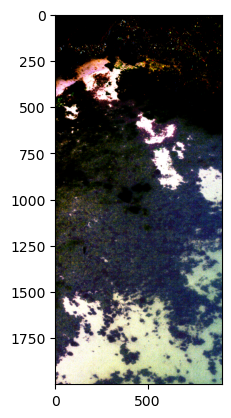

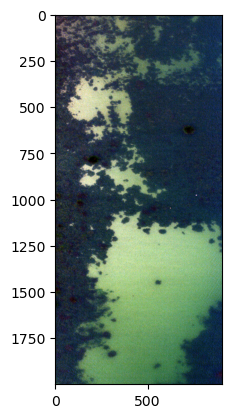

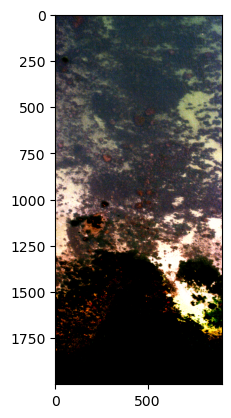

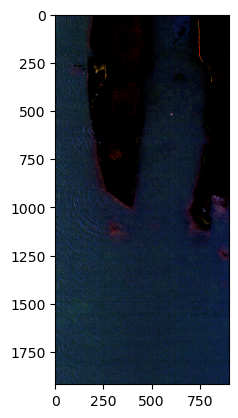

In [5]:

test_image_numbers = (6,14,19,23)

for im_num in test_image_numbers:
# for im_num in range(1,23):
    hyspec_path = hyspec_dir / f'Kongsbakkebukta_Pika_L_{im_num}-Crop Wavelengths.bip.hdr'
    
    # Load only RGB bands from image
    (image,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(hyspec_path,rgb_only=True)

    # Absolute stretch RGB image
    image_rgb = image_render.absolute_stretch(image,Rrs_limits)
    image_rgb = np.uint8(image_rgb*255)  # Convert to 8-bit int
    transparency_layer = np.ones(shape=(image_rgb.shape[0:2])+(1,),dtype=np.uint8)*255
    image_rgb = np.concatenate((image_rgb,transparency_layer),axis=2)
    
    plt.imshow(image_rgb)
    plt.show()

    # # Save RGB image
    # hyspec_base_name = hyspec_path.name.split('.')[0]
    # rgg_image_save_path = rgb_dir / (hyspec_base_name + '.png')
    # skimage.io.imsave(rgg_image_save_path,image_rgb,check_contrast=False)

    # # Read LCF and times files, create world file
    # lcf_file_name = hyspec_base_name + '.lcf'
    # times_file_name = hyspec_path.stem + '.times'
    # world_file_name = hyspec_base_name + '.wld'
    
    # lcf_file_path = lcf_dir / lcf_file_name
    # times_file_path = times_dir / times_file_name
    # world_file_path = rgb_dir / world_file_name

    # georeferencing.world_file_from_lcf_times_files(lcf_file_path,times_file_path,world_file_path)


In [6]:
for hyspec_path in tqdm(hyspec_paths):
    # Load only RGB bands from image
    (image,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(hyspec_path,rgb_only=True)

    # Absolute stretch RGB image
    image_rgb = image_render.absolute_stretch(image,Rrs_limits)
    image_rgb = np.uint8(image_rgb*255)  # Convert to 8-bit int
    transparency_layer = np.ones(shape=(image_rgb.shape[0:2])+(1,),dtype=np.uint8)*255
    image_rgb = np.concatenate((image_rgb,transparency_layer),axis=2)

    # Save RGB image
    hyspec_base_name = hyspec_path.name.split('.')[0]
    rgg_image_save_path = rgb_dir / (hyspec_base_name + '.png')
    skimage.io.imsave(rgg_image_save_path,image_rgb,check_contrast=False)

    # Read LCF and times files, create world file
    lcf_file_name = hyspec_base_name + '.lcf'
    times_file_name = hyspec_path.stem + '.times'
    world_file_name = hyspec_base_name + '.wld'
    
    lcf_file_path = lcf_dir / lcf_file_name
    times_file_path = times_dir / times_file_name
    world_file_path = rgb_dir / world_file_name

    georeferencing.world_file_from_lcf_times_files(lcf_file_path,times_file_path,world_file_path)

100%|██████████| 26/26 [03:23<00:00,  7.83s/it]
